# Limpeza e Tratamento de Dados

- Problema Geral: 
    > Será dado um aqruivo com dados para análise e tratamento deles.

## Importações

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
dataset = pd.read_csv('tempo.csv', sep=';')
dataset.head()

Aparencia  Temperatura  Umidade       Vento Jogar
0       sol           85     85.0       FALSO   nao
1       sol           80     90.0  VERDADEIRO   nao
2   nublado           83     86.0       FALSO   sim
3     chuva           70      NaN       FALSO   sim
4     chuva           68     80.0       FALSO   sim

In [3]:
dataset.shape

(14, 5)

## Informações importantes

- Do banco de dado acima temos que:
 - O banco de dados possui 14 **instâncias** (linhas) (vemos apenas 5 linhas) e 5 **atributos**(colunas) .
 - **Dados categóricos**: Aparência | Vento | Jogar
 - **Dados numéricos**: Temperatura | Umidade
<br>
- Vamos analisar na seguinte ordem: <br>
 **1º Categóricos**: Aparencia > Vento > Jogar <br>
 **2º Numéricos**: Temperatura > Umidade <br>
 - Depois da análise, segue tratamento em mesma ordem
 

### Análises 

#### Aparência

In [6]:
agrupa_aparencia = dataset.groupby(['Aparencia']).size() #filtro resummo
agrupa_aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

- Nesse resumo consta um elemento chamado '*menos*'. Fora do domínio. Verificando em gráfico:

<AxesSubplot:xlabel='Aparencia'>

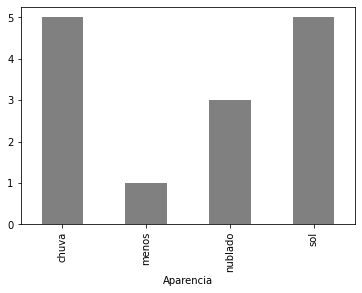

In [7]:
#gráfico barra
agrupa_aparencia.plot.bar(color = 'gray') 

#### Vento

In [8]:
agrupa_vento = dataset.groupby(['Vento']).size()
agrupa_vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<AxesSubplot:xlabel='Vento'>

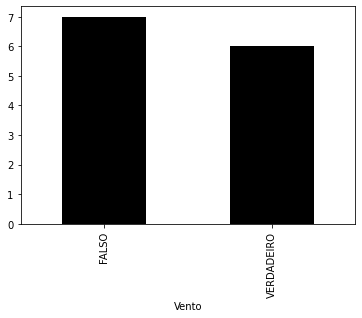

In [9]:
agrupa_vento.plot.bar(color = 'black')

#### Jogar

In [10]:
agrupa_jogar = dataset.groupby(['Jogar']).size()
agrupa_jogar

Jogar
nao    5
sim    9
dtype: int64

<AxesSubplot:xlabel='Jogar'>

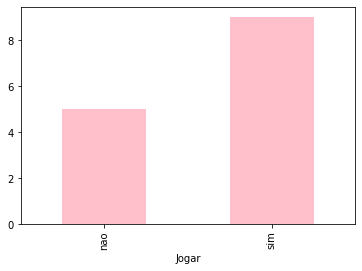

In [11]:
agrupa_jogar.plot.bar(color = 'pink')

#### Temperatura

In [12]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

 - Este método (.describe()) retorna um resumo interessante com parâmetros estatísticos gerais
 - Observa-se que entre a *mean* e o *50%*, é possível verificar uma distância entre valores.

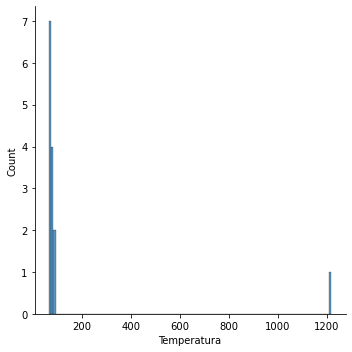

In [13]:
#Gráfico barra pelo Seaborn
srn.displot(dataset['Temperatura'])

<AxesSubplot:xlabel='Temperatura'>

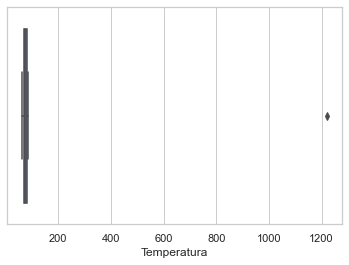

In [22]:
#Boxplot pelo Seaborn
srn.set_theme(style="whitegrid")
srn.boxplot(x=dataset["Temperatura"])

#### Umidade

In [23]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

- **mean** e **50%** não estão tão distantes

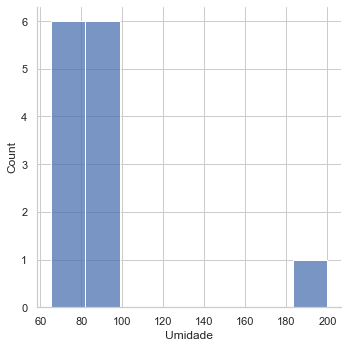

In [24]:
srn.displot(dataset['Umidade'])

Text(0.5, 1.0, 'Umidade')

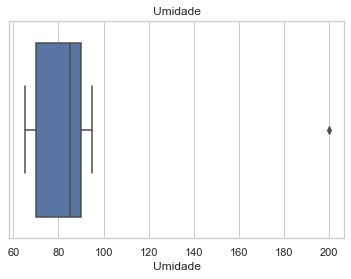

In [25]:
srn.set_theme(style="whitegrid")
srn.boxplot(x=dataset["Umidade"]).set_title('Umidade')
#set_title('Umidade') põe o título 'Umidade' acima do gráfico

- No gráfico **boxplot** é possível ver um dado outlines.

#### Valores Nulos NAN

In [27]:
#Soma quantidade de valores nulos de cada coluna
dataset.isnull().sum() 

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

- Dado que há valores nulos, na coluna Umidade e Vento. 

### Tratamento

#### Aparência

 - Como visto na etapa análise, dentro dos valores *'Aparência'* aparece um valor 'fora de domínio'. Que é o **menos**. 
 - A ideia é substituí-lo pela moda.

- A moda é Chuva ou Sol. Vamos colocar Sol por imaginar que **para o negócio** é interessante que se faça sol para que se possa jogar. Sendo positivos e contando com a positividade do clima. 
- **Para um caso real**, talvez fosse necessário analizar o **histórico** do clima da região nos últimos anos pars o período especificado, e poder escolher entre um ou o outro.

In [28]:
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrupa_aparencia = dataset.groupby('Aparencia').size()
agrupa_aparencia

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

> *dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'*
- dataset.loc é uma função para localizar um dado. No caso do exemplo acima, a função localiza dentro do *dataset['Aparência']* (que é a coluna aparência dos dados referência) a palavra 'menos' e substitui pea palavra 'sol'. 


#### Temperatura

- Como visto na seção análise, o valor máximo da temperatura excete os +130F. Precisamos **ajustar o domínio** da temperatura, **levando os valores que estão fora do domínio para o valor que representa a mediana.**

In [30]:
dataset.loc[(dataset['Temperatura'] > -130) | (dataset['Temperatura'] < 130)]
#retorna todos os dados queestão entre -130 e +130

Aparencia  Temperatura  Umidade       Vento Jogar
0        sol           85     85.0       FALSO   nao
1        sol           80     90.0  VERDADEIRO   nao
2    nublado           83     86.0       FALSO   sim
3      chuva           70      NaN       FALSO   sim
4      chuva           68     80.0       FALSO   sim
5      chuva           65     70.0  VERDADEIRO   nao
6        sol           64     65.0  VERDADEIRO   sim
7        sol         1220     95.0       FALSO   nao
8        sol           69     70.0       FALSO   sim
9      chuva           75    200.0         NaN   sim
10       sol           75     70.0  VERDADEIRO   sim
11   nublado           72     90.0  VERDADEIRO   sim
12   nublado           81     75.0       FALSO   sim
13     chuva           71     91.0  VERDADEIRO   nao

In [31]:
#calculo mediana statistics
medianatemp = sts.median(dataset['Temperatura'])  
medianatemp

73.5

In [34]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = medianatemp
dataset.loc[(dataset['Temperatura'] <-130) | (dataset['Temperatura'] > 130)] #verifica se há outliers

Empty DataFrame
Columns: [Aparencia, Temperatura, Umidade, Vento, Jogar]
Index: []

#### Umidade

- Como visto na seção análise, existem valores que excedem o limiar superior que é de 100. 
- Imitando o procedimento anterior temos que :

In [36]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

Aparencia  Temperatura  Umidade Vento Jogar
9     chuva         75.0    200.0   NaN   sim

In [37]:
medianaumid = sts.median(dataset['Umidade'])
medianaumid

85.5

In [38]:
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = medianaumid
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100)]

Empty DataFrame
Columns: [Aparencia, Temperatura, Umidade, Vento, Jogar]
Index: []

- Como visto na seção análise, a coluna 'Umidade' possui valores nulos

In [39]:
agrupado_umidade = dataset.groupby(['Umidade']).size()
agrupado_umidade

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    1
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

In [40]:
dataset['Umidade'].isnull().sum() 

1

In [41]:
dataset['Umidade'].fillna(medianaumid, inplace=True) 
dataset['Umidade'].isnull().sum()

0

#### Vento

- Como visto na seção análise, a coluna vento retorna se é 'Verdadeiro' ou 'Falso'. Então, trata-se de um dado categórico. 
- Não há valores fora de domínio (fora de 'Verdadeiro' ou 'Falso'). 
- **Precisamos verificar se há dados nulos**, e havendo, transformá-lo na moda (visto que é um dado categórico). 

In [42]:
dataset['Vento'].isnull().sum() 

1

In [43]:
dataset['Vento'].fillna('FALSO', inplace=True)
dataset['Vento'].isnull().sum()

0